In [31]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
import matplotlib.pyplot as plt

In [2]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/sample/meta_Computers.json.gz

--2022-05-23 17:30:07--  http://deepyeti.ucsd.edu/jianmo/amazon/sample/meta_Computers.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7010521 (6.7M) [application/octet-stream]
Saving to: ‘meta_Computers.json.gz.1’

meta_Computers.json 100%[===================>]   6.69M  1.67MB/s    in 5.9s    

2022-05-23 17:30:13 (1.14 MB/s) - ‘meta_Computers.json.gz.1’ saved [7010521/7010521]



In [2]:
### load the meta data

data = []
with gzip.open('meta_Computers.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

18772
{'description': ['Brand new. Still in factory-sealed plastic.'], 'title': 'Kelby Training DVD: The Adobe Photoshop CS5 7-Point System for Camera Raw By Scott Kelby', 'image': ['https://images-na.ssl-images-amazon.com/images/I/31IlLImCVJL._SS40_.jpg'], 'brand': 'Kelby Training', 'rank': ['>#654,681 in Electronics (See Top 100 in Electronics)'], 'main_cat': 'Computers', 'date': 'December 2, 2011', 'asin': '0321732960'}


In [3]:
# convert list into pandas dataframe

df = pd.DataFrame.from_dict(data)

print(len(df))

18772


In [20]:
### remove rows with unformatted title (i.e. some 'title' may still contain html style content)

df3 = df.fillna('')
df4 = df3[df3.title.str.contains('getTime')] # unformatted rows
df5 = df3[~df3.title.str.contains('getTime')] # filter those unformatted rows
print(len(df4))
print(len(df5))

135
18637


In [5]:
# how those unformatted rows look like
df4.iloc[0]

description                                                      
title           var aPageStart = (new Date()).getTime();\nvar ...
image                                                            
brand                                              DS Miller Inc.
rank            [>#1,826,312 in Electronics (See Top 100 in El...
main_cat                                                Computers
date                                                March 1, 2010
asin                                                   B0016C5EXY
feature                                                          
tech1                                                            
also_buy                                                         
price                                                            
also_view                                                        
tech2                                                            
details                                                          
similar_it

In [21]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18637 entries, 0 to 18771
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   18637 non-null  object
 1   title         18637 non-null  object
 2   image         18637 non-null  object
 3   brand         18637 non-null  object
 4   rank          18637 non-null  object
 5   main_cat      18637 non-null  object
 6   date          18637 non-null  object
 7   asin          18637 non-null  object
 8   feature       18637 non-null  object
 9   tech1         18637 non-null  object
 10  also_buy      18637 non-null  object
 11  price         18637 non-null  object
 12  also_view     18637 non-null  object
 13  tech2         18637 non-null  object
 14  details       18637 non-null  object
 15  similar_item  18637 non-null  object
dtypes: object(16)
memory usage: 2.4+ MB


In [22]:
df5.head()

,description,title,image,brand,rank,main_cat,date,asin,feature,tech1,also_buy,price,also_view,tech2,details,similar_item
0,[Brand new. Still in factory-sealed plastic.],Kelby Training DVD: The Adobe Photoshop CS5 7-...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#654,681 in Electronics (See Top 100 in Elec...",Computers,"December 2, 2011",0321732960,,,,,,,,
1,[If you're already a Photoshop user and want a...,Kelby Training DVD: Adobe Photoshop CS5 Power ...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#830,165 in Electronics (See Top 100 in Elec...",Computers,"November 7, 2011",0321735722,,,,,,,,
2,[School To Home Notes: Note From the Teacher!\...,TEACHERS FRIEND NOTE FROM THE TEACHER SCHOOL T...,[https://images-na.ssl-images-amazon.com/image...,TEACHERS FRIEND,"[>#1,233,887 in Electronics (See Top 100 in El...",Computers,"June 6, 2007",0439651859,,,,,,,,
3,[Dooqi is a young brand specializing in high-e...,"[3-pack]Ipad Mini Screen Protector, Dooqi Scre...",[https://images-na.ssl-images-amazon.com/image...,dooqi,"[>#454,595 in Electronics (See Top 100 in Elec...",Computers,"December 5, 2014",0545729971,"[Hard coated for Scratch Proof (Hardness: 4H),...",,,,,,,
4,[Cover for Nook HD],Hd+ Cheetah Cover- Nook,,Nook,"[>#85,661 in Computers & Accessories (See top ...",Computers,"September 11, 2013",0594450284,[Cheetah cover],"{'Brand Name': 'Nook', 'Item Weight': '1 pound...",,,,,,


In [23]:
df5.drop(columns=['tech1', 'also_buy', 'price', 'also_view', 'tech2','details', 'similar_item',"main_cat"],inplace=True)

/tmp/ipykernel_3076/731368693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.drop(columns=['tech1', 'also_buy', 'price', 'also_view', 'tech2','details', 'similar_item',"main_cat"],inplace=True)


In [24]:
df5['description_1']=df5.description.map(lambda x: str(x))

/tmp/ipykernel_3076/3221915053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['description_1']=df5.description.map(lambda x: str(x))


In [25]:
df5['date_formatted'] =  pd.to_datetime(df5['date'], infer_datetime_format=True)
df5

/tmp/ipykernel_3076/1068007682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['date_formatted'] =  pd.to_datetime(df5['date'], infer_datetime_format=True)


,description,title,image,brand,rank,date,asin,feature,description_1,date_formatted
0,[Brand new. Still in factory-sealed plastic.],Kelby Training DVD: The Adobe Photoshop CS5 7-...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#654,681 in Electronics (See Top 100 in Elec...","December 2, 2011",0321732960,,['Brand new. Still in factory-sealed plastic.'],2011-12-02
1,[If you're already a Photoshop user and want a...,Kelby Training DVD: Adobe Photoshop CS5 Power ...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#830,165 in Electronics (See Top 100 in Elec...","November 7, 2011",0321735722,,"[""If you're already a Photoshop user and want ...",2011-11-07
2,[School To Home Notes: Note From the Teacher!\...,TEACHERS FRIEND NOTE FROM THE TEACHER SCHOOL T...,[https://images-na.ssl-images-amazon.com/image...,TEACHERS FRIEND,"[>#1,233,887 in Electronics (See Top 100 in El...","June 6, 2007",0439651859,,['School To Home Notes: Note From the Teacher!...,2007-06-06
3,[Dooqi is a young brand specializing in high-e...,"[3-pack]Ipad Mini Screen Protector, Dooqi Scre...",[https://images-na.ssl-images-amazon.com/image...,dooqi,"[>#454,595 in Electronics (See Top 100 in Elec...","December 5, 2014",0545729971,"[Hard coated for Scratch Proof (Hardness: 4H),...","[""Dooqi is a young brand specializing in high-...",2014-12-05
4,[Cover for Nook HD],Hd+ Cheetah Cover- Nook,,Nook,"[>#85,661 in Computers & Accessories (See top ...","September 11, 2013",0594450284,[Cheetah cover],['Cover for Nook HD'],2013-09-11
...,...,...,...,...,...,...,...,...,...,...
18767,,"iPad Mini 4 Case, Aceguarder New Design [Dirtp...",[https://images-na.ssl-images-amazon.com/image...,,"[>#372,769 in Electronics (See Top 100 in Elec...","July 11, 2016",B01HI72XZW,,,2016-07-11
18768,,MIJIU Nylon Canvas Military Tactical Men Waist...,[https://images-na.ssl-images-amazon.com/image...,,"[>#308,759 in Electronics (See Top 100 in Elec...","June 29, 2016",B01HIEI83Q,,,2016-06-29
18769,[Deadpool is a mercenary and anti-hero appeari...,Marvel Deadpool Laptop Backpack,[https://images-na.ssl-images-amazon.com/image...,Bioworld,"[>#4,064 in Computers & Accessories (See top 1...","June 24, 2016",B01HIQYNJM,"[Officially Licensed, One main zippered compar...",['Deadpool is a mercenary and anti-hero appear...,2016-06-24
18770,,Funnel Cup (Ultra Pink),[https://images-na.ssl-images-amazon.com/image...,JDDZ,"[>#449,492 in Electronics (See Top 100 in Elec...","March 5, 2017",B01HIWBL46,,,2017-03-05


In [26]:
df5['description_1']=df5.description_1.str.strip("[]'")

/tmp/ipykernel_3076/1303831097.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['description_1']=df5.description_1.str.strip("[]'")


In [13]:
df5["brand"].groupby(df5["brand"].isna()).count()

brand
False    18637
Name: brand, dtype: int64

In [27]:
df5.head()

,description,title,image,brand,rank,date,asin,feature,description_1,date_formatted
0,[Brand new. Still in factory-sealed plastic.],Kelby Training DVD: The Adobe Photoshop CS5 7-...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#654,681 in Electronics (See Top 100 in Elec...","December 2, 2011",0321732960,,Brand new. Still in factory-sealed plastic.,2011-12-02
1,[If you're already a Photoshop user and want a...,Kelby Training DVD: Adobe Photoshop CS5 Power ...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#830,165 in Electronics (See Top 100 in Elec...","November 7, 2011",0321735722,,"""If you're already a Photoshop user and want a...",2011-11-07
2,[School To Home Notes: Note From the Teacher!\...,TEACHERS FRIEND NOTE FROM THE TEACHER SCHOOL T...,[https://images-na.ssl-images-amazon.com/image...,TEACHERS FRIEND,"[>#1,233,887 in Electronics (See Top 100 in El...","June 6, 2007",0439651859,,School To Home Notes: Note From the Teacher!\\...,2007-06-06
3,[Dooqi is a young brand specializing in high-e...,"[3-pack]Ipad Mini Screen Protector, Dooqi Scre...",[https://images-na.ssl-images-amazon.com/image...,dooqi,"[>#454,595 in Electronics (See Top 100 in Elec...","December 5, 2014",0545729971,"[Hard coated for Scratch Proof (Hardness: 4H),...","""Dooqi is a young brand specializing in high-e...",2014-12-05
4,[Cover for Nook HD],Hd+ Cheetah Cover- Nook,,Nook,"[>#85,661 in Computers & Accessories (See top ...","September 11, 2013",0594450284,[Cheetah cover],Cover for Nook HD,2013-09-11


In [17]:
df5['brand_cat']=df5.brand.map(lambda x : 0 if len(x) <1 else 1)
df5.brand_cat.unique()

/tmp/ipykernel_3076/2771495910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['brand_cat']=df5.brand.map(lambda x : 0 if len(x) <1 else 1)


array([1, 0])

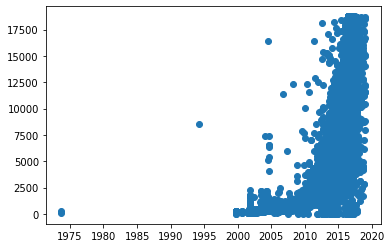

In [36]:
plt.scatter(df5.date_formatted,df5.index)

In [38]:
df5['rank1']=df5['rank'].map(lambda x: str(x).strip("[]'"))

/tmp/ipykernel_3076/2613211194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['rank1']=df5['rank'].map(lambda x: str(x).strip("[]'"))


In [39]:
df5

,description,title,image,brand,rank,date,asin,feature,description_1,date_formatted,rank1
0,[Brand new. Still in factory-sealed plastic.],Kelby Training DVD: The Adobe Photoshop CS5 7-...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#654,681 in Electronics (See Top 100 in Elec...","December 2, 2011",0321732960,,Brand new. Still in factory-sealed plastic.,2011-12-02,">#654,681 in Electronics (See Top 100 in Elect..."
1,[If you're already a Photoshop user and want a...,Kelby Training DVD: Adobe Photoshop CS5 Power ...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#830,165 in Electronics (See Top 100 in Elec...","November 7, 2011",0321735722,,"""If you're already a Photoshop user and want a...",2011-11-07,">#830,165 in Electronics (See Top 100 in Elect..."
2,[School To Home Notes: Note From the Teacher!\...,TEACHERS FRIEND NOTE FROM THE TEACHER SCHOOL T...,[https://images-na.ssl-images-amazon.com/image...,TEACHERS FRIEND,"[>#1,233,887 in Electronics (See Top 100 in El...","June 6, 2007",0439651859,,School To Home Notes: Note From the Teacher!\\...,2007-06-06,">#1,233,887 in Electronics (See Top 100 in Ele..."
3,[Dooqi is a young brand specializing in high-e...,"[3-pack]Ipad Mini Screen Protector, Dooqi Scre...",[https://images-na.ssl-images-amazon.com/image...,dooqi,"[>#454,595 in Electronics (See Top 100 in Elec...","December 5, 2014",0545729971,"[Hard coated for Scratch Proof (Hardness: 4H),...","""Dooqi is a young brand specializing in high-e...",2014-12-05,">#454,595 in Electronics (See Top 100 in Elect..."
4,[Cover for Nook HD],Hd+ Cheetah Cover- Nook,,Nook,"[>#85,661 in Computers & Accessories (See top ...","September 11, 2013",0594450284,[Cheetah cover],Cover for Nook HD,2013-09-11,">#85,661 in Computers & Accessories (See top 100)"
...,...,...,...,...,...,...,...,...,...,...,...
18767,,"iPad Mini 4 Case, Aceguarder New Design [Dirtp...",[https://images-na.ssl-images-amazon.com/image...,,"[>#372,769 in Electronics (See Top 100 in Elec...","July 11, 2016",B01HI72XZW,,,2016-07-11,">#372,769 in Electronics (See Top 100 in Elect..."
18768,,MIJIU Nylon Canvas Military Tactical Men Waist...,[https://images-na.ssl-images-amazon.com/image...,,"[>#308,759 in Electronics (See Top 100 in Elec...","June 29, 2016",B01HIEI83Q,,,2016-06-29,">#308,759 in Electronics (See Top 100 in Elect..."
18769,[Deadpool is a mercenary and anti-hero appeari...,Marvel Deadpool Laptop Backpack,[https://images-na.ssl-images-amazon.com/image...,Bioworld,"[>#4,064 in Computers & Accessories (See top 1...","June 24, 2016",B01HIQYNJM,"[Officially Licensed, One main zippered compar...",Deadpool is a mercenary and anti-hero appearin...,2016-06-24,">#4,064 in Computers & Accessories (See top 100)"
18770,,Funnel Cup (Ultra Pink),[https://images-na.ssl-images-amazon.com/image...,JDDZ,"[>#449,492 in Electronics (See Top 100 in Elec...","March 5, 2017",B01HIWBL46,,,2017-03-05,">#449,492 in Electronics (See Top 100 in Elect..."


In [40]:
df5["rank1"]=df5["rank1"].map(lambda x: str(x))
df5["rank1"]=df5["rank1"].str.replace(pat='>#',repl='', regex=False)

/tmp/ipykernel_3076/4145307409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["rank1"]=df5["rank1"].map(lambda x: str(x))
/tmp/ipykernel_3076/4145307409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["rank1"]=df5["rank1"].str.replace(pat='>#',repl='', regex=False)


In [41]:
df5["rank1"]=df5["rank1"].map(lambda x: x.replace(",",""))

/tmp/ipykernel_3076/2162198519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["rank1"]=df5["rank1"].map(lambda x: x.replace(",",""))


In [43]:
df5["rank1"].head()

0    654681 in Electronics (See Top 100 in Electron...
1    830165 in Electronics (See Top 100 in Electron...
2    1233887 in Electronics (See Top 100 in Electro...
3    454595 in Electronics (See Top 100 in Electron...
4       85661 in Computers & Accessories (See top 100)
Name: rank1, dtype: object

In [44]:
df5["rank1"]=df5["rank1"].map(lambda x: x.split("in"))

/tmp/ipykernel_3076/743146037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["rank1"]=df5["rank1"].map(lambda x: x.split("in"))


In [45]:
df5["rank1"] = df5["rank1"].map(lambda x: x[0])

/tmp/ipykernel_3076/1942946291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["rank1"] = df5["rank1"].map(lambda x: x[0])


In [46]:
df5

,description,title,image,brand,rank,date,asin,feature,description_1,date_formatted,rank1
0,[Brand new. Still in factory-sealed plastic.],Kelby Training DVD: The Adobe Photoshop CS5 7-...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#654,681 in Electronics (See Top 100 in Elec...","December 2, 2011",0321732960,,Brand new. Still in factory-sealed plastic.,2011-12-02,654681
1,[If you're already a Photoshop user and want a...,Kelby Training DVD: Adobe Photoshop CS5 Power ...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#830,165 in Electronics (See Top 100 in Elec...","November 7, 2011",0321735722,,"""If you're already a Photoshop user and want a...",2011-11-07,830165
2,[School To Home Notes: Note From the Teacher!\...,TEACHERS FRIEND NOTE FROM THE TEACHER SCHOOL T...,[https://images-na.ssl-images-amazon.com/image...,TEACHERS FRIEND,"[>#1,233,887 in Electronics (See Top 100 in El...","June 6, 2007",0439651859,,School To Home Notes: Note From the Teacher!\\...,2007-06-06,1233887
3,[Dooqi is a young brand specializing in high-e...,"[3-pack]Ipad Mini Screen Protector, Dooqi Scre...",[https://images-na.ssl-images-amazon.com/image...,dooqi,"[>#454,595 in Electronics (See Top 100 in Elec...","December 5, 2014",0545729971,"[Hard coated for Scratch Proof (Hardness: 4H),...","""Dooqi is a young brand specializing in high-e...",2014-12-05,454595
4,[Cover for Nook HD],Hd+ Cheetah Cover- Nook,,Nook,"[>#85,661 in Computers & Accessories (See top ...","September 11, 2013",0594450284,[Cheetah cover],Cover for Nook HD,2013-09-11,85661
...,...,...,...,...,...,...,...,...,...,...,...
18767,,"iPad Mini 4 Case, Aceguarder New Design [Dirtp...",[https://images-na.ssl-images-amazon.com/image...,,"[>#372,769 in Electronics (See Top 100 in Elec...","July 11, 2016",B01HI72XZW,,,2016-07-11,372769
18768,,MIJIU Nylon Canvas Military Tactical Men Waist...,[https://images-na.ssl-images-amazon.com/image...,,"[>#308,759 in Electronics (See Top 100 in Elec...","June 29, 2016",B01HIEI83Q,,,2016-06-29,308759
18769,[Deadpool is a mercenary and anti-hero appeari...,Marvel Deadpool Laptop Backpack,[https://images-na.ssl-images-amazon.com/image...,Bioworld,"[>#4,064 in Computers & Accessories (See top 1...","June 24, 2016",B01HIQYNJM,"[Officially Licensed, One main zippered compar...",Deadpool is a mercenary and anti-hero appearin...,2016-06-24,4064
18770,,Funnel Cup (Ultra Pink),[https://images-na.ssl-images-amazon.com/image...,JDDZ,"[>#449,492 in Electronics (See Top 100 in Elec...","March 5, 2017",B01HIWBL46,,,2017-03-05,449492


In [47]:
df6=df5[df5["rank1"]!='']

In [48]:
df6["rank1"]=df6["rank1"].astype("int64")

/tmp/ipykernel_3076/2319163233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6["rank1"]=df6["rank1"].astype("int64")


In [52]:
df6.rank1.max()

9464714

In [53]:
df6.sort_values("rank1")

,description,title,image,brand,rank,date,asin,feature,description_1,date_formatted,rank1
13181,"[Nothing says ""Game Over"" for the Xbox One exp...",Seagate Game Drive for Xbox 2TB Green (STEA200...,[https://images-na.ssl-images-amazon.com/image...,Seagate,[>#54 in Computers & Accessories (See top 100)],"August 5, 2015",B01065S79E,"[Works flawlessly with Xbox One and Xbox 360, ...","Nothing says ""Game Over"" for the Xbox One expe...",2015-08-05,54
18609,[This Bundle is only designed for Apple Pencil...,[3-Piece] Fintie Bundle for Apple Pencil Cap H...,[https://images-na.ssl-images-amazon.com/image...,Fintie,[>#259 in Electronics (See Top 100 in Electron...,"June 17, 2016",B01H6Q03IY,"[Made of silicone rubber, durable. Easy to ins...","""This Bundle is only designed for Apple Pencil...",2016-06-17,259
17337,[Logitech Wireless Touch Keyboard K400 Plus La...,Logitech Wireless Touch Keyboard K400 Plus wit...,[https://images-na.ssl-images-amazon.com/image...,Logitech,[>#307 in Computers & Accessories (See top 100)],"April 8, 2016",B01E0BUPW2,[Certified Refurbished product is tested & cer...,Logitech Wireless Touch Keyboard K400 Plus Lai...,2016-04-08,307
5859,[Micro USB Host OTG Cable with Micro USB Power...,DSYJ Micro USB Host OTG Cable with Micro USB P...,,DSYJ,[>#333 in Computers & Accessories (See top 100)],"May 21, 2013",B00CXAC1ZW,"[Plastic, Imported, Plastic, Imported, Micro U...",Micro USB Host OTG Cable with Micro USB Power ...,2013-05-21,333
14412,[SHD(Super High-Definition )Pursuit of High De...,"RJ45 Connectors,SHD Cat6 Connector Cat5e Conne...",[https://images-na.ssl-images-amazon.com/image...,SHD,[>#367 in Electronics (See Top 100 in Electron...,"November 9, 2017",B015OBFQNK,[SHD 100PCS RJ45 Connectors Modular Plug Clear...,SHD(Super High-Definition )Pursuit of High Def...,2017-11-09,367
...,...,...,...,...,...,...,...,...,...,...,...
15219,[There are two Network Display amplifiers: the...,Crown DCi 8|600ND | 8 Channel AVB Power Amplif...,[https://images-na.ssl-images-amazon.com/image...,Crown,"[>#2,009,707 in Electronics (See Top 100 in El...","March 1, 2016",B017X020NO,[Crowns DriveCore technology includes five pat...,There are two Network Display amplifiers: the ...,2016-03-01,2009707
15559,,Sling Handle Grip Long Shaped With Strap - Uni...,[https://images-na.ssl-images-amazon.com/image...,SaiTech IT,"[>#2,009,897 in Electronics (See Top 100 in El...","June 16, 2016",B0194WKAYA,,,2016-06-16,2009897
5136,[Protect Computer Products Ch1110-104 Cherry K...,Protect Computer Products Cherry Kb-0556/ku-05...,,PROTECT COMPUTER PRODUCTS,"[>#2,010,923 in Electronics (See Top 100 in El...","December 26, 2012",B00AT4O39Q,[A quality product by PROTECT COMPUTER PRODUCT...,Protect Computer Products Ch1110-104 Cherry Kb...,2012-12-26,2010923
15494,,Liili Mouse Pad Natural Rubber Mousepad Basket...,[https://images-na.ssl-images-amazon.com/image...,Liili Inc,"[>#2,033,187 in Office Products (See Top 100 i...","May 19, 2016",B018WYMD2S,,,2016-05-19,2033187


In [54]:
df6["title_count"] = df6["title"].map(lambda x: len(x))

/tmp/ipykernel_3076/1711478850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6["title_count"] = df6["title"].map(lambda x: len(x))


In [57]:
df6["desc_count"] = df6["description_1"].map(lambda x: len(x))
df6["img_count"] = df6["image"].map(lambda x: len(x))

/tmp/ipykernel_3076/1829239013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6["desc_count"] = df6["description_1"].map(lambda x: len(x))
/tmp/ipykernel_3076/1829239013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6["img_count"] = df6["image"].map(lambda x: len(x))


In [67]:
df6[df6['title_count'] == 2000]['title']

7744    Replacement keyboard compatible with ASUS A52 ...
Name: title, dtype: object

In [182]:
df6[['rank']].iloc[500][0]

['>#1,669,621 in Electronics (See Top 100 in Electronics)']

In [59]:
df6=df5[df5["rank1"]!=""]

In [71]:
df6['brand_cat']=df6.brand.map(lambda x : 0 if len(x) <1 else 1)


/tmp/ipykernel_3076/3078922460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['brand_cat']=df6.brand.map(lambda x : 0 if len(x) <1 else 1)


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [97]:
X = df6[["brand_cat","title_count","desc_count","img_count"]]
X_2 = df6[["title_count","desc_count","img_count"]]

# y = df6[["rank1"]].astype("int64")
y=df6.rank1
         
         
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X_train.shape,X_test.shape

((12566, 4), (5386, 4))

In [83]:
X_train_2,X_test_2,y_train,y_test = train_test_split(X_2,y,test_size=0.3)

In [73]:
y.info()
# y=df6.rank1

<class 'pandas.core.series.Series'>
Int64Index: 17952 entries, 0 to 18771
Series name: rank1
Non-Null Count  Dtype
--------------  -----
17952 non-null  int64
dtypes: int64(1)
memory usage: 280.5 KB


In [105]:
model = LinearRegression().fit(X_train, y_train)
model.score(X_test,y_test)

0.0963400054523309

In [69]:
import matplotlib.pyplot as plt

In [123]:
df6.date_formatted

0       2011-12-02
1       2011-11-07
2       2007-06-06
3       2014-12-05
4       2013-09-11
           ...    
18767   2016-07-11
18768   2016-06-29
18769   2016-06-24
18770   2017-03-05
18771   2017-03-16
Name: date_formatted, Length: 17952, dtype: datetime64[ns]

In [121]:
df6[df6.brand_cat == 0].count()

description       462
title             462
image             462
brand             462
rank              462
date              462
asin              462
feature           462
description_1     462
date_formatted    462
rank1             462
title_count       462
desc_count        462
img_count         462
brand_cat         462
dtype: int64

In [99]:
from sklearn.decomposition import PCA

In [102]:
pca = PCA()

X_pca = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)
model_pca = LinearRegression().fit(X_pca,y_train)
model_pca.score(X_pca_test,y_test)





0.0963400054523309

In [103]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train_2)
X_scaled_test = scaler.transform(X_test_2)

model_3 = LinearRegression().fit(X_scaled_train,y_train)
model_3.coef_

array([-4607.18599956,  7069.0821019 ,   699.36408325])

In [112]:
y_test.min(),y_train.min()

(259, 54)

(array([3111., 2369., 2128., 1477., 1008.,  647.,  615.,  576.,  420.,
         215.]),
 array([5.4000000e+01, 2.0114090e+05, 4.0222780e+05, 6.0331470e+05,
        8.0440160e+05, 1.0054885e+06, 1.2065754e+06, 1.4076623e+06,
        1.6087492e+06, 1.8098361e+06, 2.0109230e+06]),
 <BarContainer object of 10 artists>)

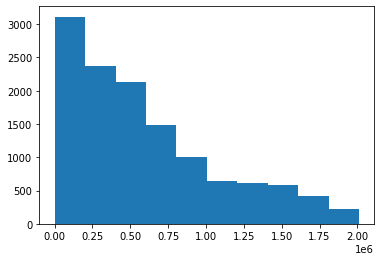

In [116]:
plt.hist(y_train,bins=10)

In [133]:
df6[df6.rank1 < 5000].image[616]

['https://images-na.ssl-images-amazon.com/images/I/41yzF9MzX6L._SS40_.jpg',
 'https://images-na.ssl-images-amazon.com/images/I/416WQCbmIVL._SS40_.jpg',
 'https://images-na.ssl-images-amazon.com/images/I/312%2BeccTMFL._SS40_.jpg',
 'https://images-na.ssl-images-amazon.com/images/I/41O0qXAJhNL._SS40_.jpg',
 'https://images-na.ssl-images-amazon.com/images/I/41UMyob%2B9TL._SS40_.jpg',
 'https://images-na.ssl-images-amazon.com/images/I/413E2hh0iNL._SS40_.jpg',
 'https://images-na.ssl-images-amazon.com/images/I/41%2BzmBUIP1L._SS36_.jpg']

In [189]:
predic_point = X_test.iloc[0]

AttributeError: 'Series' object has no attribute 'reshape'

In [194]:
df6

,description,title,image,brand,rank,date,asin,feature,description_1,date_formatted,rank1,title_count,desc_count,img_count,brand_cat
0,[Brand new. Still in factory-sealed plastic.],Kelby Training DVD: The Adobe Photoshop CS5 7-...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#654,681 in Electronics (See Top 100 in Elec...","December 2, 2011",0321732960,,Brand new. Still in factory-sealed plastic.,2011-12-02,654681,88,43,1,1
1,[If you're already a Photoshop user and want a...,Kelby Training DVD: Adobe Photoshop CS5 Power ...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#830,165 in Electronics (See Top 100 in Elec...","November 7, 2011",0321735722,,"""If you're already a Photoshop user and want a...",2011-11-07,830165,72,257,1,1
2,[School To Home Notes: Note From the Teacher!\...,TEACHERS FRIEND NOTE FROM THE TEACHER SCHOOL T...,[https://images-na.ssl-images-amazon.com/image...,TEACHERS FRIEND,"[>#1,233,887 in Electronics (See Top 100 in El...","June 6, 2007",0439651859,,School To Home Notes: Note From the Teacher!\\...,2007-06-06,1233887,58,257,1,1
3,[Dooqi is a young brand specializing in high-e...,"[3-pack]Ipad Mini Screen Protector, Dooqi Scre...",[https://images-na.ssl-images-amazon.com/image...,dooqi,"[>#454,595 in Electronics (See Top 100 in Elec...","December 5, 2014",0545729971,"[Hard coated for Scratch Proof (Hardness: 4H),...","""Dooqi is a young brand specializing in high-e...",2014-12-05,454595,201,443,5,1
4,[Cover for Nook HD],Hd+ Cheetah Cover- Nook,,Nook,"[>#85,661 in Computers & Accessories (See top ...","September 11, 2013",0594450284,[Cheetah cover],Cover for Nook HD,2013-09-11,85661,23,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18767,,"iPad Mini 4 Case, Aceguarder New Design [Dirtp...",[https://images-na.ssl-images-amazon.com/image...,,"[>#372,769 in Electronics (See Top 100 in Elec...","July 11, 2016",B01HI72XZW,,,2016-07-11,372769,187,0,6,0
18768,,MIJIU Nylon Canvas Military Tactical Men Waist...,[https://images-na.ssl-images-amazon.com/image...,,"[>#308,759 in Electronics (See Top 100 in Elec...","June 29, 2016",B01HIEI83Q,,,2016-06-29,308759,55,0,5,0
18769,[Deadpool is a mercenary and anti-hero appeari...,Marvel Deadpool Laptop Backpack,[https://images-na.ssl-images-amazon.com/image...,Bioworld,"[>#4,064 in Computers & Accessories (See top 1...","June 24, 2016",B01HIQYNJM,"[Officially Licensed, One main zippered compar...",Deadpool is a mercenary and anti-hero appearin...,2016-06-24,4064,31,297,4,1
18770,,Funnel Cup (Ultra Pink),[https://images-na.ssl-images-amazon.com/image...,JDDZ,"[>#449,492 in Electronics (See Top 100 in Elec...","March 5, 2017",B01HIWBL46,,,2017-03-05,449492,23,0,1,1


In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [231]:
text_feat = df6[['description','title','feature']]
text_feat['description'] = text_feat.description.map(lambda x: str(x))
text_feat['feature'] = text_feat.feature.map(lambda x: str(x))


/tmp/ipykernel_3076/2295959563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_feat['description'] = text_feat.description.map(lambda x: str(x))
/tmp/ipykernel_3076/2295959563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_feat['feature'] = text_feat.feature.map(lambda x: str(x))


In [232]:
text_feat

,description,title,feature
0,['Brand new. Still in factory-sealed plastic.'],Kelby Training DVD: The Adobe Photoshop CS5 7-...,
1,"[""If you're already a Photoshop user and want ...",Kelby Training DVD: Adobe Photoshop CS5 Power ...,
2,['School To Home Notes: Note From the Teacher!...,TEACHERS FRIEND NOTE FROM THE TEACHER SCHOOL T...,
3,"[""Dooqi is a young brand specializing in high-...","[3-pack]Ipad Mini Screen Protector, Dooqi Scre...",['Hard coated for Scratch Proof (Hardness: 4H)...
4,['Cover for Nook HD'],Hd+ Cheetah Cover- Nook,['Cheetah cover']
...,...,...,...
18767,,"iPad Mini 4 Case, Aceguarder New Design [Dirtp...",
18768,,MIJIU Nylon Canvas Military Tactical Men Waist...,
18769,['Deadpool is a mercenary and anti-hero appear...,Marvel Deadpool Laptop Backpack,"['Officially Licensed', 'One main zippered com..."
18770,,Funnel Cup (Ultra Pink),


In [233]:
vectorizer = TfidfVectorizer(max_features=100)
X_vectorized = vectorizer.fit_transform(text_feat.feature)
vectorizer.get_feature_names_out()

array(['10', '100', '15', 'access', 'all', 'an', 'and', 'any', 'are',
       'as', 'at', 'back', 'battery', 'be', 'black', 'bluetooth', 'built',
       'by', 'cable', 'can', 'card', 'case', 'color', 'compatible',
       'core', 'cover', 'design', 'designed', 'device', 'display',
       'drive', 'dual', 'durable', 'easy', 'features', 'fit', 'for',
       'free', 'from', 'full', 'gb', 'ghz', 'hard', 'hd', 'high', 'in',
       'inch', 'included', 'includes', 'intel', 'ipad', 'is', 'it',
       'keyboard', 'laptop', 'leather', 'made', 'material', 'memory',
       'more', 'new', 'no', 'not', 'of', 'on', 'one', 'only', 'or',
       'other', 'pc', 'port', 'ports', 'power', 'processor', 'product',
       'protection', 'quality', 'ram', 'screen', 'size', 'stand',
       'support', 'tablet', 'that', 'the', 'this', 'to', 'touch', 'type',
       'up', 'usb', 'use', 'warranty', 'when', 'will', 'windows',
       'wireless', 'with', 'you', 'your'], dtype=object)

In [204]:
X_vectorized


<17952x35251 sparse matrix of type '<class 'numpy.float64'>'
	with 291351 stored elements in Compressed Sparse Row format>

In [223]:
vectorizer.get_feature_names_out()

array(['10', '11', '12', '13', '14', '15', '17', '8gb', 'ac', 'acer',
       'adapter', 'air', 'and', 'android', 'apple', 'asus', 'bag',
       'battery', 'black', 'blue', 'bluetooth', 'cable', 'camera', 'card',
       'case', 'cell', 'charger', 'compatible', 'computer', 'cord',
       'core', 'cover', 'decal', 'dell', 'desktop', 'display', 'drive',
       'dual', 'flash', 'for', 'galaxy', 'gaming', 'hard', 'hd', 'hdd',
       'high', 'hp', 'in', 'inch', 'intel', 'ipad', 'keyboard', 'kit',
       'laptop', 'leather', 'lenovo', 'macbook', 'memory', 'mini',
       'model', 'mouse', 'new', 'notebook', 'pack', 'pad', 'pc', 'pink',
       'power', 'pro', 'protective', 'protector', 'ram', 'red',
       'replacement', 'retina', 'samsung', 'satellite', 'screen',
       'series', 'skin', 'sleeve', 'slim', 'smart', 'sony', 'stand',
       'sticker', 'supply', 'tab', 'tablet', 'to', 'toshiba', 'touch',
       'ultra', 'usb', 'vgn', 'white', 'wifi', 'windows', 'wireless',
       'with'], dtype=obj

In [243]:
from ..deep_seo.utils import lemmatize

ImportError: attempted relative import with no known parent package

In [241]:
%load_ext autoreload
%autoreload 2